### Unemployment Analysis with Python
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project

### Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

### Loading the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Harbiodun\Documents\Data Science and AI\OIBSIP\documents\Unemployment\Unemployment in India.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
dataset.columns = ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']

In [4]:
dataset.shape

(768, 7)

### Exploratory Data Analysis

In [5]:
# check sum of null rows in a column
dataset.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [6]:
# check the number of columns in the dataset
dataset.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
# drop the frequency column 
dataset = dataset.drop(columns='Frequency', axis=0)

In [8]:
dataset.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


Remove null rows

In [9]:
# remove null rows
dataset = dataset.dropna(subset=['Region'])

In [10]:
dataset.shape

(740, 6)

In [11]:
# check if there are still null rows or columns
dataset.isna().sum()

Region                                     0
Date                                       0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [12]:
# check data type of each column
dataset.dtypes

Region                                      object
Date                                        object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [13]:
dataset.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [14]:
# convert the Date column from string to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [15]:
# extract the year from the date
dataset['Year'] = dataset['Date'].dt.year

# convert the year datatype to string
dataset['Year'] = dataset['Year'].astype(str)

In [16]:
# drop the date column
dataset = dataset.drop(columns='Date', axis=0)

In [17]:
dataset

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
0,Andhra Pradesh,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,5.17,12256762.0,44.68,Rural,2019
...,...,...,...,...,...,...
749,West Bengal,7.55,10871168.0,44.09,Urban,2020
750,West Bengal,6.67,10806105.0,43.34,Urban,2020
751,West Bengal,15.63,9299466.0,41.20,Urban,2020
752,West Bengal,15.22,9240903.0,40.67,Urban,2020


In [18]:
# check the distinct regions in the dataset
dataset['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [19]:
# check the areas in the dataset
dataset['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [20]:
# check the years in the dataset
dataset['Year'].unique()

array(['2019', '2020'], dtype=object)

### Data Visualisation
Plot a bar chart of unemployment against other columns

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Harbiodun\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
def plot_graph(X, y):
    plt.figure(figsize=(10,5))
    plt.xlabel(X)
    plt.ylabel(y)
    plt.title(X +' vs '+ y)
    plt.xticks(rotation=90)
    return plt.bar(dataset[X], dataset[y])

How unemployment rate has gone over the years

<BarContainer object of 740 artists>

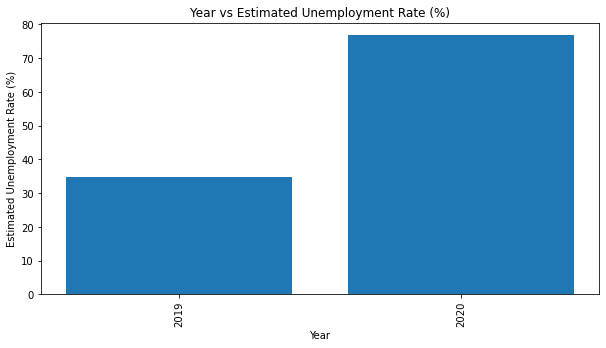

In [23]:
plot_graph('Year', 'Estimated Unemployment Rate (%)')

Unemployement rate relating to the area

<BarContainer object of 740 artists>

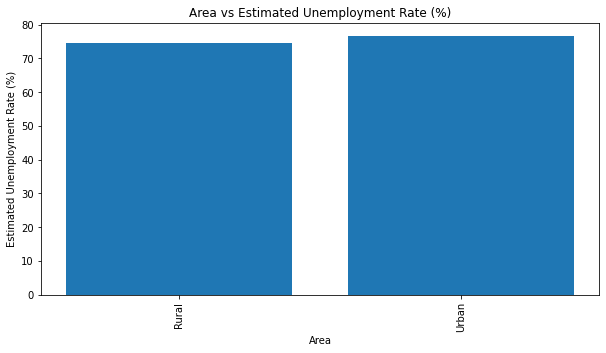

In [24]:
plot_graph('Area', 'Estimated Unemployment Rate (%)')

Unemployment rate relating to the region

<BarContainer object of 740 artists>

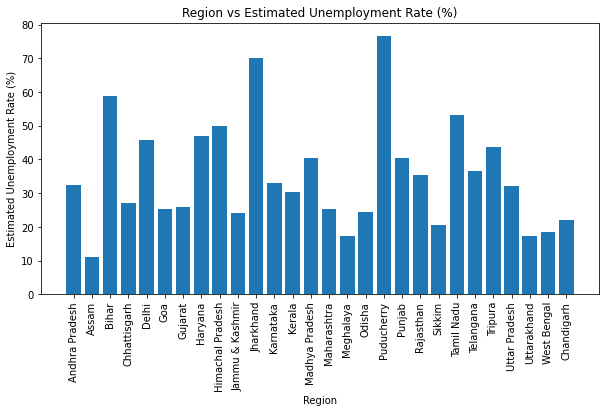

In [25]:
plot_graph('Region', 'Estimated Unemployment Rate (%)')

Labour Participation Rate relating to the region

<BarContainer object of 740 artists>

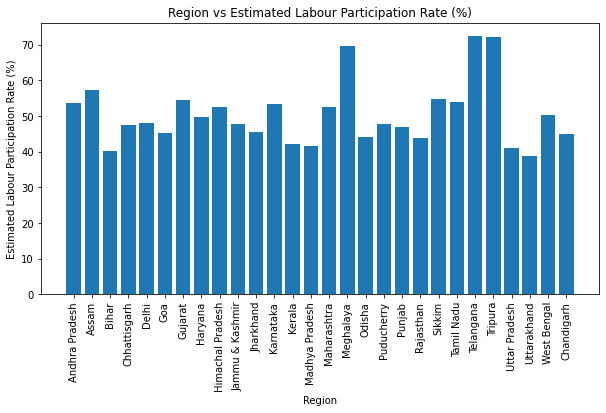

In [26]:
plot_graph('Region', 'Estimated Labour Participation Rate (%)')

Estimated Labour Participation Rate over the years

<BarContainer object of 740 artists>

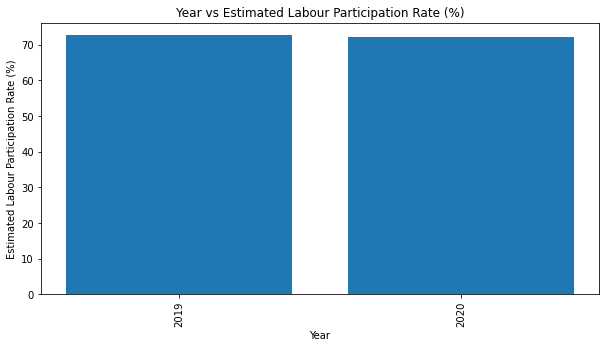

In [27]:
plot_graph('Year', 'Estimated Labour Participation Rate (%)')

Average Estimated Labour Participation Rate of each area

In [28]:
area_average = dataset.groupby('Area')['Estimated Labour Participation Rate (%)'].mean()
area_average

Area
Rural    44.464819
Urban    40.901365
Name: Estimated Labour Participation Rate (%), dtype: float64

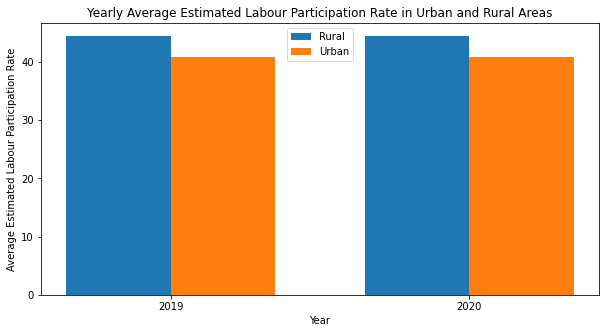

In [29]:
length = len(dataset['Year'].unique())

# width of each bar
bar_width = 0.35

# positions for the bars
x = np.arange(length)

# plotting the bar chart
plt.figure(figsize=(10,5))
plt.bar(x-bar_width/2, area_average[0], width=bar_width, label='Rural')
plt.bar(x+bar_width/2, area_average[1], width=bar_width, label='Urban')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Estimated Labour Participation Rate')
plt.xticks(x, dataset['Year'].unique())
plt.title('Yearly Average Estimated Labour Participation Rate in Urban and Rural Areas')
plt.legend(loc='upper center')

plt.show()

### Observations
From the analysis of the dataset, it was found out that:
1. The average estimated labour participation rate is much more in the rural areas than in the urban.
2. Labour participation rate is almost the same over the two years.
3. The region with the highest labour participation rate is Telegana.
4. The region with the highest unemployment rate is Puducherry.
5. The unemployment rate in the urban areas is more than the rural areas.
6. The unemployment rate increased over the years.